In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from skimage import data, exposure, img_as_float
import os
import cv2
import random
from random import *
from random import random, shuffle, choice
import shutil

Using TensorFlow backend.


In [2]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [3]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dropout(0.3,name='Droupout')(x) 
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation


/usr/local/lib/python3.5/dist-packages/keras_applications/mobilenet.py:207: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [4]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture
#model.summary()

In [5]:
#for i,layer in enumerate(model.layers):
    #print(i,layer.name)

In [6]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:70]:
    layer.trainable=False
for layer in model.layers[70:]:
    layer.trainable=True

940
<generator object walk at 0x7fd2301fc4c0>
Train : [None, None]
Found 0 images belonging to 0 classes.
yes
no
yes
yes
yes
yes
no
yes
no


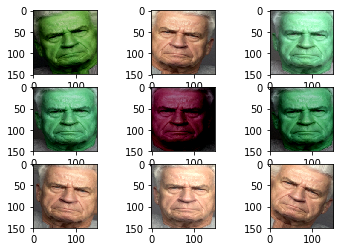

In [17]:
import glob

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True) #included in our dependencies

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255. 
    return img_tensor

def get_nb_files(directory):
  """Get number of files by searching directory recursively"""
  if not os.path.exists(directory):
    return 0
  cnt = 0
  for r, dirs, files in os.walk(directory):
    for dr in dirs:
      cnt = len(glob.glob(os.path.join(r, dr + "/*")))
  return cnt

img_path = '/home/himani/MobileNet/data_agumentation/image/004_o_m_a_b.jpg'
img = load_image(img_path)
img_path2 = '/home/himani/MobileNet/profile/train'
print(get_nb_files(img_path2))
print(os.walk(img_path2))


def load_dir(path):
    train = []
    folders = ['human', 'none']
    for fld in folders:
        files = glob.glob(path)
        for fl in files:
            #img = image.load_img(fl)
            img = cv2.imread(path)
            train.append(img)
    return train

train_data = load_dir(img_path2)       
print('Train :', train_data)
        
def AHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

'''def scr(img) :
    b,g,r = cv2.split(img)
    print("bgr",b,g,r)
    color = [b,g,r]
    print("color",color)
    #color2 = color.copy()
    shuffle(color)
    print("color2",color)
    im = cv2.merge(color)
    #im = cv2.resize(im, (150,150))/255.
    #code = "1"
    #p = True
    return im'''

def scr(img):
    answer = choice(['yes', 'no'])
    print(answer)
    if(answer == 'yes'):
        b,g,r = cv2.split(img)
        #print("bgr",b,g,r)
        color = [b,g,r]
        #print("color",color)
        #color2 = color.copy()
        shuffle(color)
        #print("color2",color)
        im = cv2.merge(color)
        #im = cv2.resize(im, (150,150))/255.
        #code = "1"
        #p = True
        return im
    else :
        return img

train_generator=train_datagen.flow_from_directory('/home/himani/MobileNet/data_agumentation/image',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=10,
                                                 class_mode='categorical',shuffle=True)
datagen = ImageDataGenerator(
    rotation_range=20, horizontal_flip=0.5,
     # width_shift_range=0.05,
      #height_shift_range=0.05,
      #shear_range=0.2,
      #zoom_range=0.2,
      channel_shift_range=0.4,                     
      preprocessing_function=scr,
      fill_mode='nearest'
      )




datagen.fit(img)
os.makedirs('images')
i=0
for img_batch in datagen.flow(img, batch_size=1,save_to_dir='images', save_prefix='aug', save_format='png'):
    for img in img_batch:
        plt.subplot(3, 3, 1 + i) # (no of rows, column, plot number) can be (331+i)
        plt.imshow(img)
        i=i+1    
    if i >= 9:
        break
        
shutil.rmtree('images')

In [2]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train, epochs=10)


NameError: name 'model' is not defined

In [65]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  
#img_path = '/home/himani/bald_imgs_26dec/Young businessman making a stupid face. Studio shot on black background..jpg'
#img_path = '/home/himani/MobileNet/HUMAN/ZenH_02659_f_25_i_nf_nc_hp_2015_1_e0_nl_o.jpg'
#img_path = '/home/himani/MobileNet/top5dl-bn.jpg'
#img_path = '/home/himani/MobileNet/crow.jpeg'
#img_path = '/home/himani/bald_imgs_26dec/0e654e23d1acbb9a0a754cb4d1629db4.jpg'


pred = model.predict(new_image)

pred

array([[1., 0.]], dtype=float32)